#### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

#### Data Collection and Processing

In [2]:
#Loading CSV data into the Data Frame
gold_data = pd.read_csv("C:\\Users\\dinesh\\Downloads\\Data Set\\gld_price_data.csv")

In [5]:
#To print first 5 rows of Data Frame
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
#To print last 5 rows of the Data Frame
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
#Number of rows and columns of the Data Frame
gold_data.shape

(2290, 6)

In [8]:
#To get some basic information of the Data Frame
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
#Checking the number of missing values
gold_data.isnull()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2285,False,False,False,False,False,False
2286,False,False,False,False,False,False
2287,False,False,False,False,False,False
2288,False,False,False,False,False,False


In [12]:
gold_data.isnull().sum()  #There is no Missing Values

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [13]:
#Statistical measures about the data  
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


#### Data Analyis

In [ ]:
#Correlation 
#1.Positive Correlation - one variable increase other variable also will increase.Both variable move in the same direction.
#2.Negative Correlation - one variable increase other variable will decrease in other direction.
#0 means not correlated

In [15]:
correlation = gold_data.corr()

<AxesSubplot:>

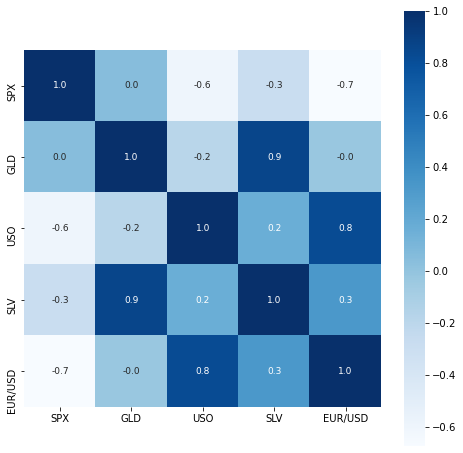

In [16]:
#Constructing  Heat map to understand the correlation

plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={'size':9}, cmap='Blues')

In [25]:
#Correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


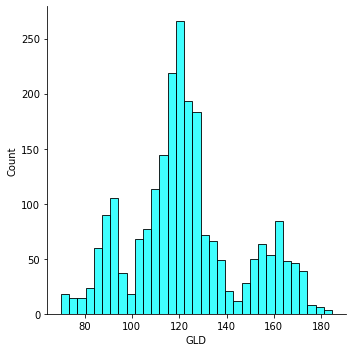

In [18]:
#Checking the distribution of gold values

sns.displot(gold_data['GLD'],color="cyan")

C:\Users\dinesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

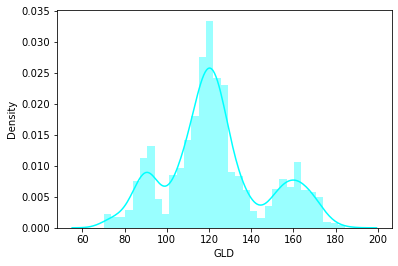

In [20]:
sns.distplot(gold_data['GLD'],color="cyan")

In [27]:
#Splitting the features(SPX,USO,SLV,EUR/USD) and Target(GLD)


X=gold_data.drop(['Date','GLD'],axis=1)  #column drop axis=1
Y=gold_data['GLD']

In [28]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [29]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


#### Splitting Test data and Training data

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

#### Model Training : Random Forest Regressor Algorithm

In [34]:
regressor = RandomForestRegressor(n_estimators=100)

In [35]:
#Training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

#### Model Evaluation

In [36]:
#Test data prediction

test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[168.64869907  82.24929961 116.05410034 127.67430084 120.80560142
 154.6841975  150.2265992  126.12940046 117.49909879 125.91090118
 116.51480121 172.17340041 141.58689867 168.03589959 115.27969998
 117.68260058 138.08900315 169.69020099 159.58400261 156.72619936
 155.18789969 125.2967002  176.90269956 157.31770403 125.14110063
  93.71429995  77.40260023 120.6451998  119.0037992  167.54449918
  88.26260072 124.9047002   91.12550086 117.77340001 121.08079903
 135.80890097 115.33780142 115.04640089 146.93800018 107.11760103
 104.16410237  87.18119781 126.44930056 117.81720026 153.98819885
 119.47969993 108.40359976 108.02279752  93.11790063 127.14379777
  74.76040034 113.64809919 121.1833     111.24459897 118.9478992
 120.40469974 158.93640023 166.79310134 147.15439713  85.68239862
  94.34480046  86.85969871  90.64570041 118.91990085 126.51910062
 127.47099989 169.9765002  122.2221994  117.4480987   98.79750082
 167.40240176 143.08479863 132.28330256 121.09980217 120.77849948
 119.777600

In [40]:
#R Squared Error
#comparision

error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R Squared Error :",error_score)

R Squared Error : 0.9891333556597924


#### Yes we got a great result.Model is performing well for this Data set.

In [ ]:
#Comparision of  Actualvalues and Predicted values  

In [41]:
Y_test=list(Y_test)

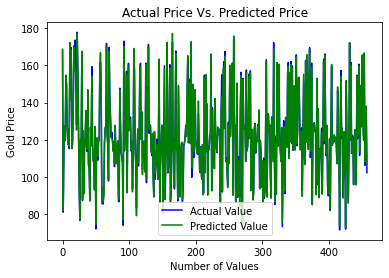

In [42]:
plt.plot(Y_test, color="Blue", label="Actual Value")
plt.plot(test_data_prediction, color="Green", label="Predicted Value")
plt.title("Actual Price Vs. Predicted Price")
plt.xlabel("Number of Values")
plt.ylabel("Gold Price")
plt.legend()
plt.show()